#**Visualization**

##**1. Top Importanat Features effecting employee performance**

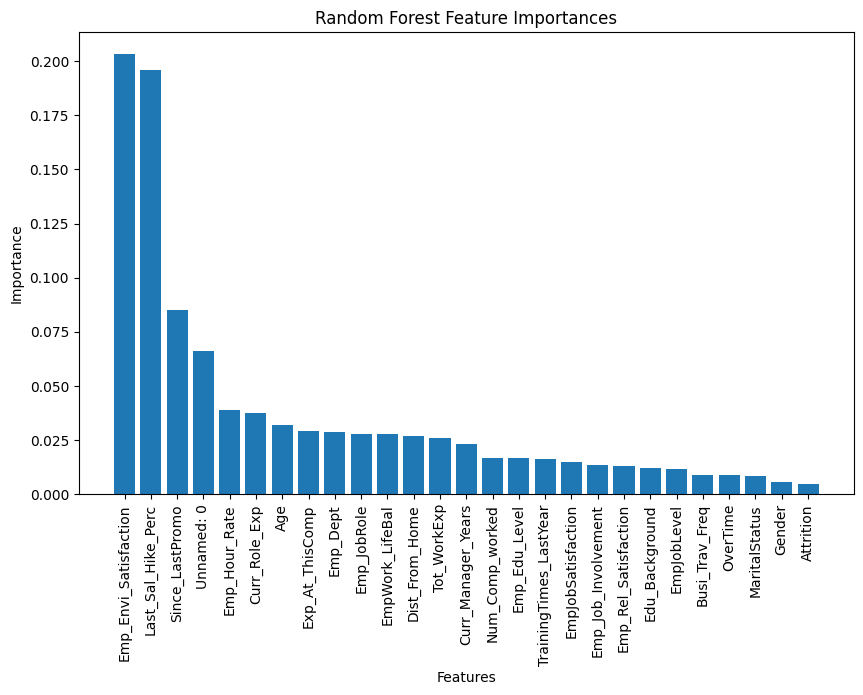

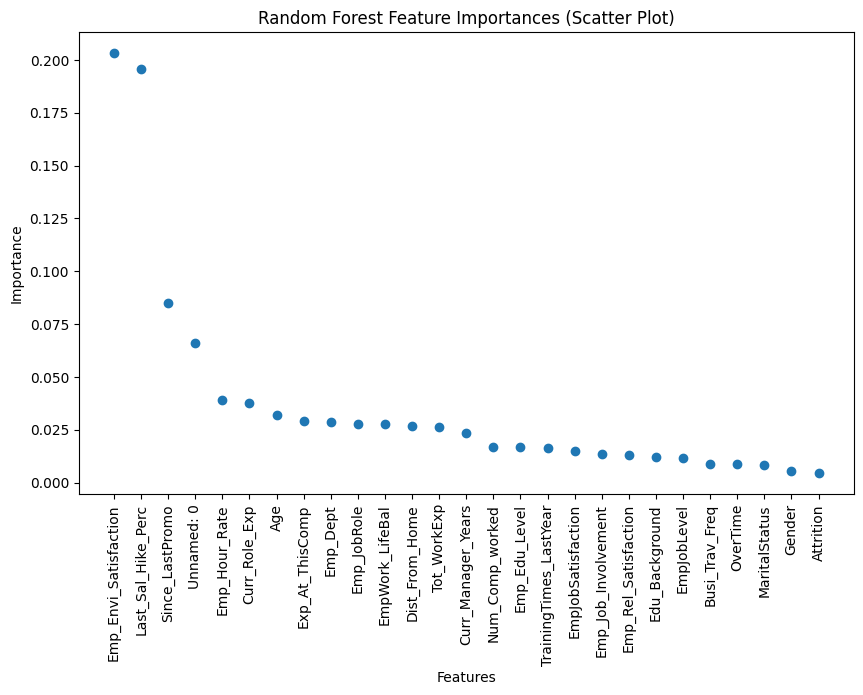

In [8]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('Preprocessed_data.csv')

x = data.drop('Performance_Rating', axis=1)  # Features
y = data['Performance_Rating']  # Target


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters as needed

# Fit the model on the training data
rf_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(x_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# for Plotting
import matplotlib.pyplot as plt

feature_importances = rf_classifier.feature_importances_
feature_names = x.columns

# Sort features by importance
sorted_indices = feature_importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices])
plt.xticks(range(len(feature_importances)), [feature_names[i] for i in sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances')
plt.show()

# With the help of scatter plot
import matplotlib.pyplot as plt

feature_importances = rf_classifier.feature_importances_
feature_names = x.columns

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(feature_importances)), feature_importances[sorted_indices])
plt.xticks(range(len(feature_importances)), [feature_names[i] for i in sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances (Scatter Plot)')
plt.show()


##In this code, we use plt.scatter to create a scatter plot. It will show each feature's importance as a point on the plot, making it easier to see the distribution of importance values across different features. The x-axis represents the features, and the y-axis represents the importance values.


#**2.EmpLastSalarayhikePercent vs Performance ranking**

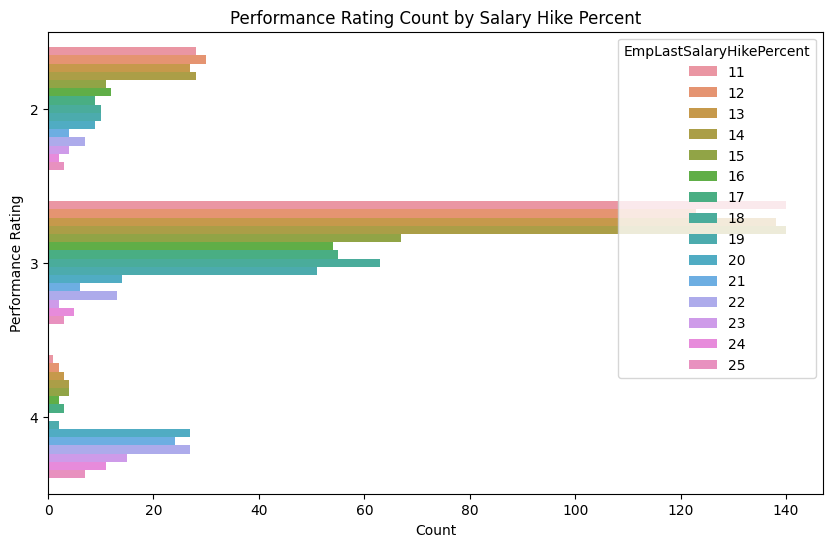

In [11]:
import pandas as pd
data = pd.read_csv('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.csv')
import seaborn as sns
import matplotlib.pyplot as plt



# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(y="PerformanceRating", hue="EmpLastSalaryHikePercent", data=data)
plt.title("Performance Rating Count by Salary Hike Percent")
plt.xlabel("Count")
plt.ylabel("Performance Rating")
plt.show()


##In this code, we use sns.countplot to create a count plot. The "PerformanceRating" will be on the y-axis, and it will be categorized by different values of "EmpLastSalaryHikePercent" using different colors. Make sure to replace 'df' with your actual DataFrame and column names.

In [13]:
Development = data[data.EmpDepartment == 'Development'] # Slicing the all coloums of Sales Row
Development.head(3)


,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
5,E1001011,27,Male,Life Sciences,Divorced,Development,Developer,Travel_Frequently,10,2,...,3,9,4,2,9,7,1,7,No,4
7,E1001019,28,Female,Life Sciences,Single,Development,Developer,Travel_Rarely,1,2,...,4,10,4,3,7,7,3,7,Yes,3
8,E1001020,36,Female,Life Sciences,Married,Development,Developer,Non-Travel,8,3,...,1,10,2,3,8,7,0,5,No,3


##**(i) Performance Rating with respect to number of employees**

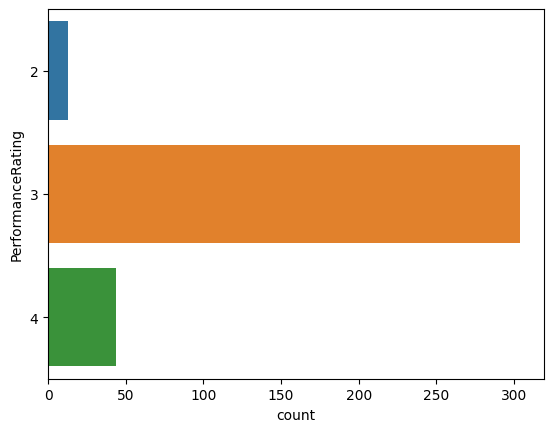

In [15]:
sns.countplot(y="PerformanceRating", data=Development);

##**(ii) Performance Rating with respect to Gender**

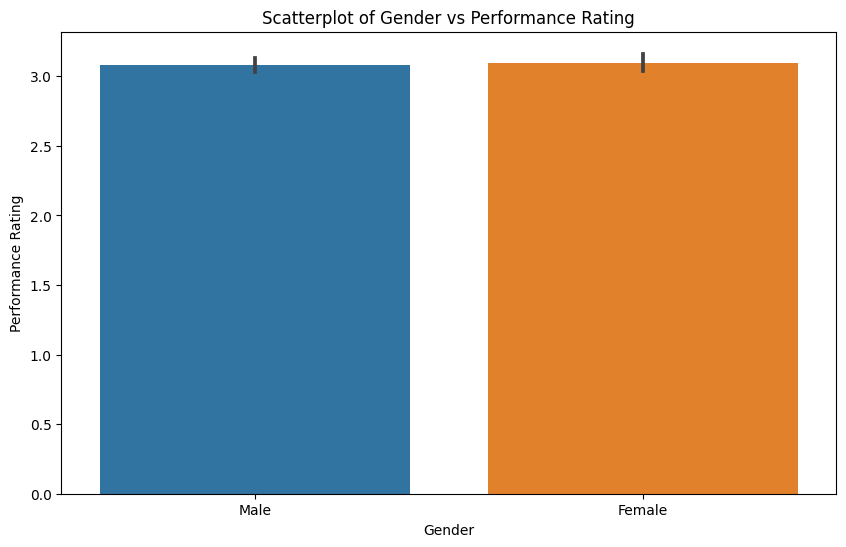

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(data=Development, x='Gender', y='PerformanceRating')
plt.title("Scatterplot of Gender vs Performance Rating")
plt.xlabel("Gender")
plt.ylabel("Performance Rating")
plt.show()

##**(iii) Performance Rating with respect to Age Group**

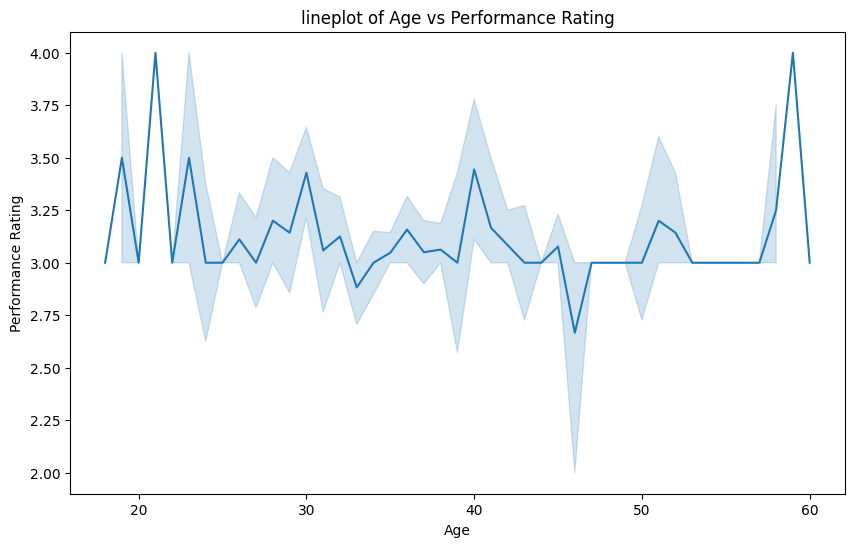

In [17]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=Development, x='Age', y='PerformanceRating')
plt.title("lineplot of Age vs Performance Rating")
plt.xlabel("Age")
plt.ylabel("Performance Rating")
plt.show()


##**(iv)Performance According to the Experience Level**

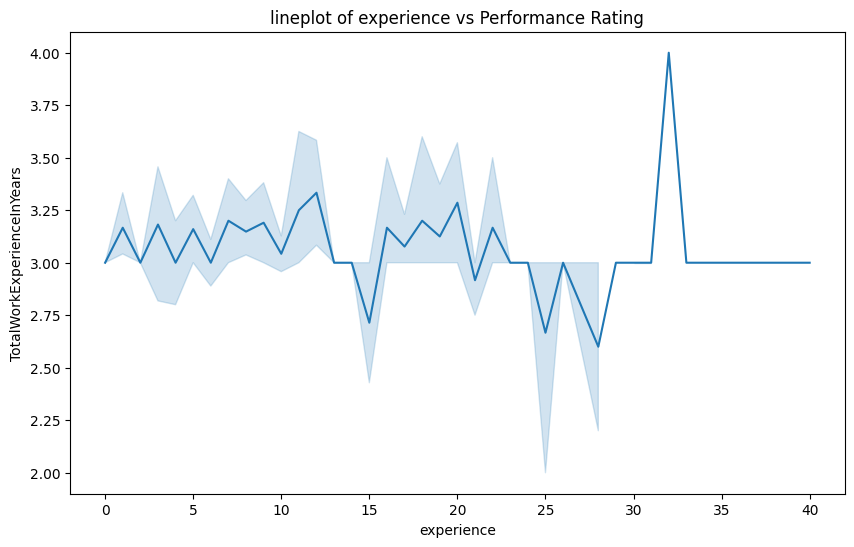

In [18]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=Development, x='TotalWorkExperienceInYears', y='PerformanceRating')
plt.title("lineplot of experience vs Performance Rating")
plt.xlabel("experience")
plt.ylabel("TotalWorkExperienceInYears")
plt.show()